# Task 3 - Customer Churn Prediction

## About Dataset

In the highly competitive banking industry, retaining customers is a critical factor for long-term success and profitability. Customer churn, the phenomenon where customers leave a bank for a competitor or alternative financial institution, can have significant financial implications. Understanding and predicting customer churn is, therefore, a top priority for many banks.

This Jupyter Notebook aims to address this challenge by utilizing machine learning techniques to build a predictive model for customer churn. We will be working with a real-world dataset from a US bank, which contains a wealth of information about its customers, their transactions, and interactions with the bank.

### Importing Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# Loading Dataset

In [2]:
df= pd.read_csv('Churn_Modelling.csv')


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df=df.drop([("RowNumber"),("CustomerId"),("Surname")], axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis

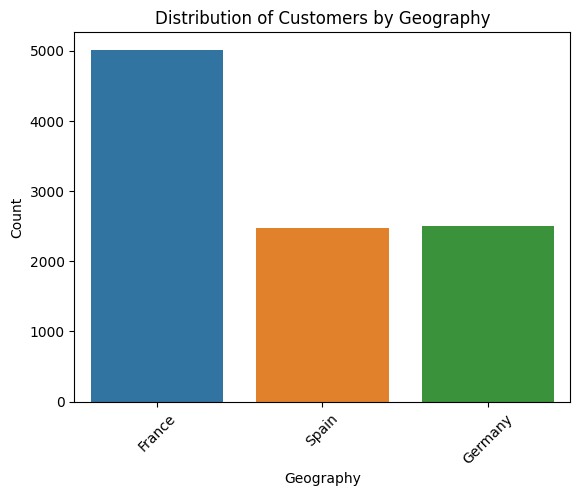

In [13]:
sns.countplot(x='Geography', data=df)
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

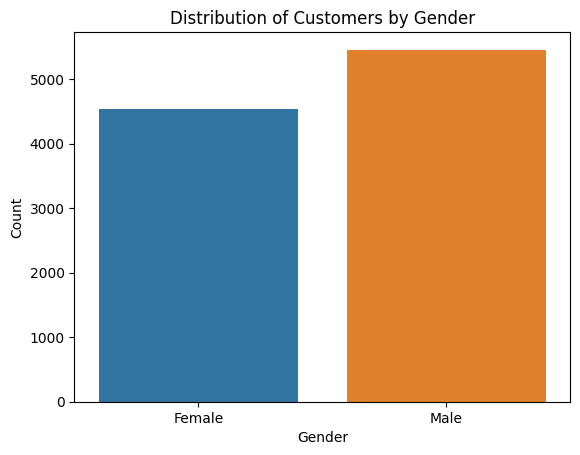

In [14]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Exited', ylabel='count'>

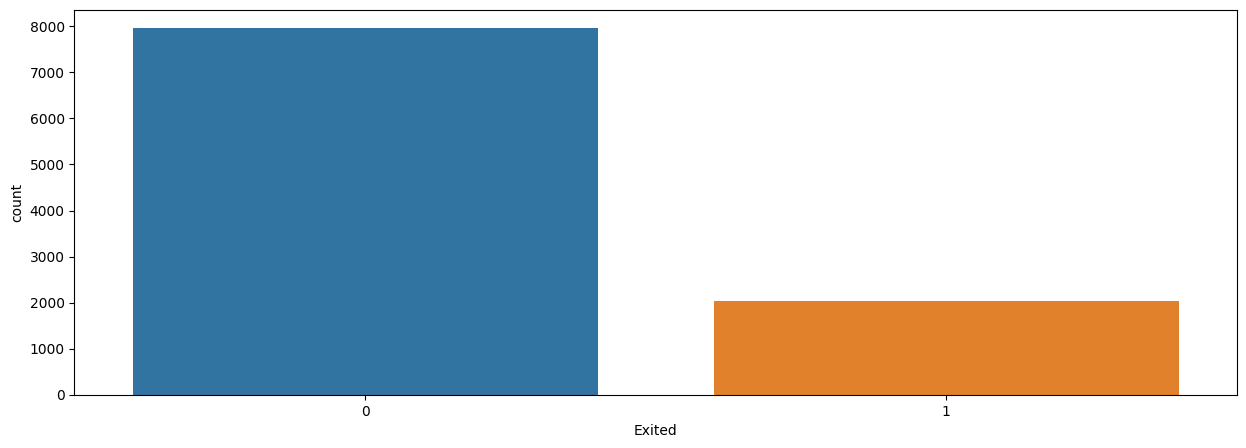

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Exited') 

<Axes: xlabel='Gender', ylabel='count'>

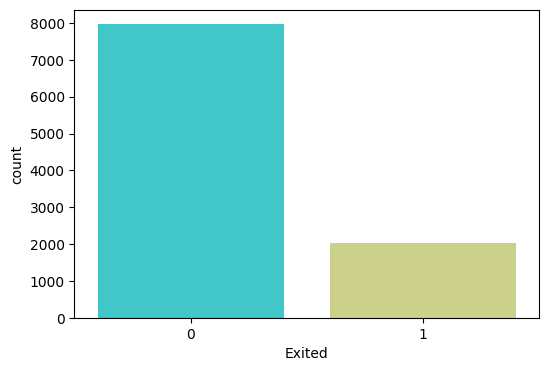

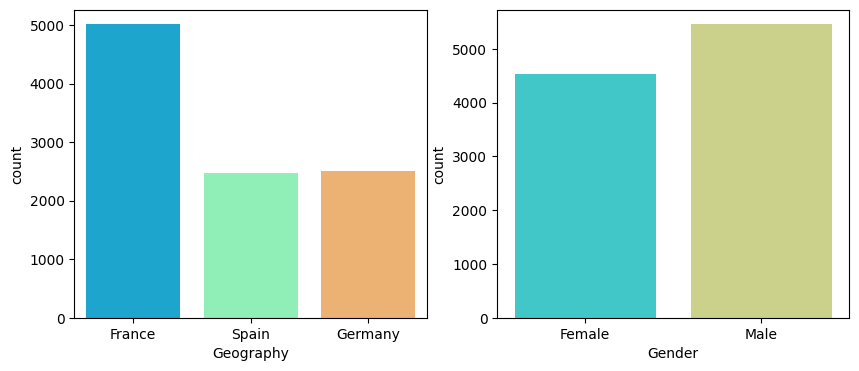

In [16]:
#visualization of the dataset from each category of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Exited',data=df,palette='rainbow')
fig=plt.figure(figsize=(10,4))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))

sns.countplot(x='Geography',data=df,palette='rainbow',ax=ax[0])
sns.countplot(x='Gender',data=df,palette='rainbow',ax=ax[1])

In [17]:
df["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

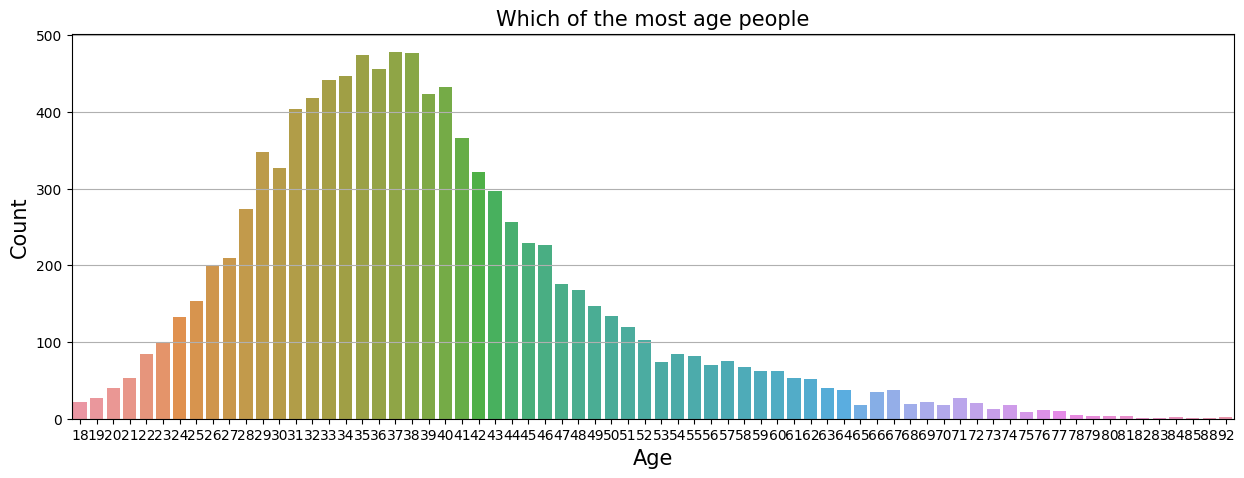

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age",data=df)
plt.title("Which of the most age people",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

### Observation:

        * This age group has the highest number of customers from 30 to 57.

# Feature Engineering

In [19]:
numerical_value = df.select_dtypes(exclude="object")
numerical_value

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


# Encoding the catogorical data

In [20]:
categorical_cols = df.select_dtypes(include='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_cols:
    df[feature] = le.fit_transform(df[feature])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


checking correlation of features with target variable 

<Axes: >

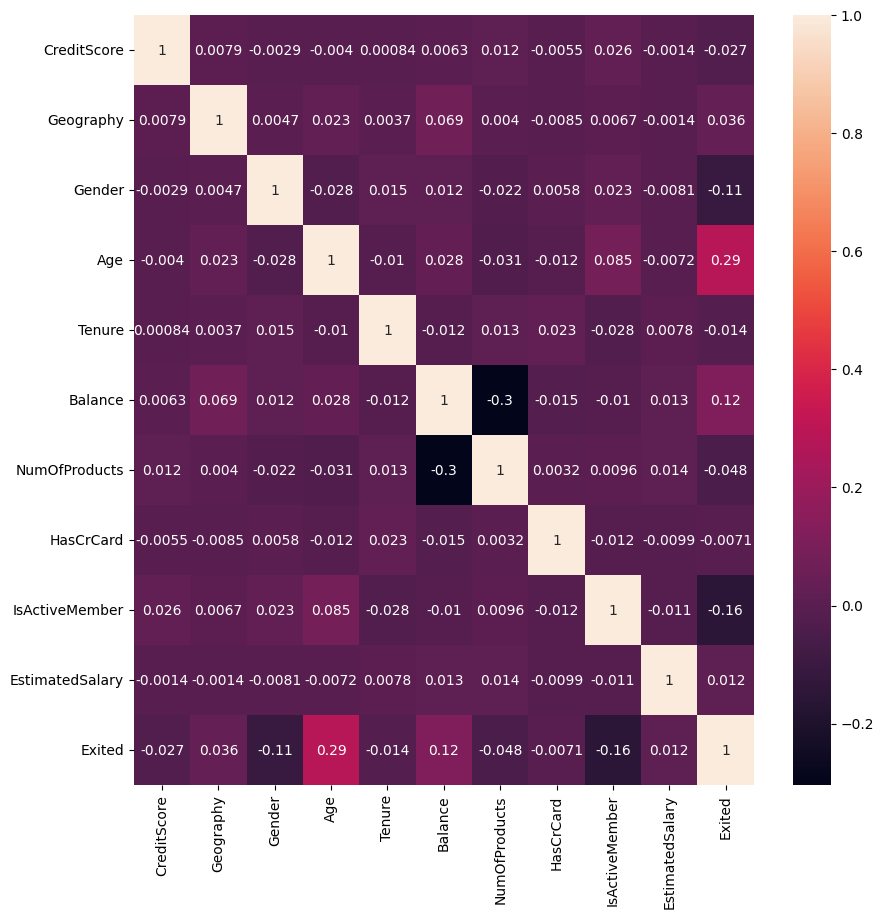

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [24]:
df_corr_exit=df.corr()['Exited'].to_frame()

<Axes: ylabel='Exited'>

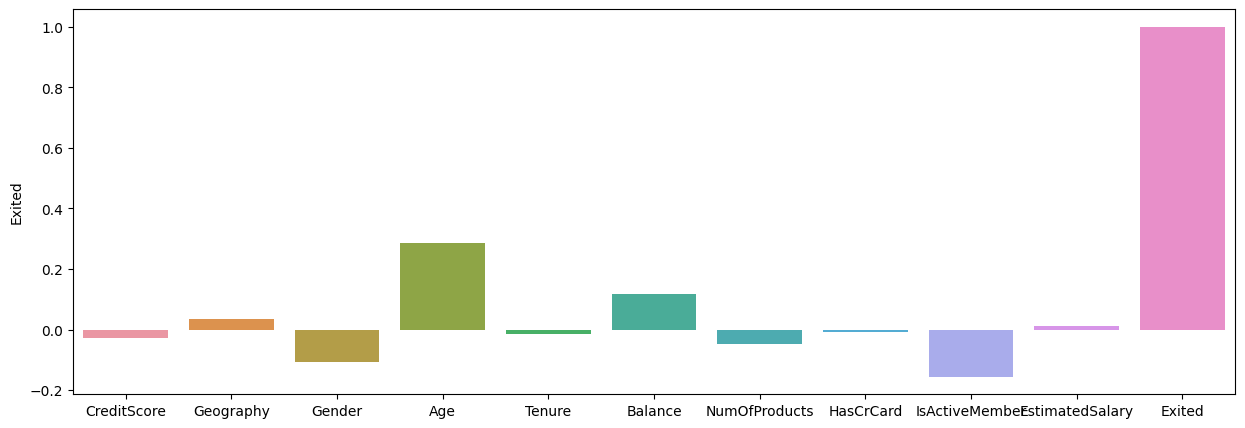

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='Exited')

# Train Test Split

In [26]:
X = df.drop(columns=["Exited","Geography","Gender"], axis=1)
Y = df["Exited"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [28]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [29]:
# Shape of the Training and Test dataset

print('Shape of X_train is -' , x_train.shape)
print('Shape of X_test is -' , x_test.shape)
print('Shape of y_train is -' , y_train.shape)
print('Shape of y_test is - ', y_test.shape)
     

Shape of X_train is - (8000, 8)
Shape of X_test is - (2000, 8)
Shape of y_train is - (8000,)
Shape of y_test is -  (2000,)


In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [31]:
x_train

array([[-0.31946814,  0.20777512, -0.70016399, ...,  0.64570298,
         0.96776914,  0.65422705],
       [ 1.13217077, -0.46444203,  0.34032739, ...,  0.64570298,
         0.96776914, -0.7046118 ],
       [-0.47500088,  0.78396125,  0.68715785, ...,  0.64570298,
        -1.03330429,  1.56032831],
       ...,
       [-1.16971378, -0.56047305, -0.00650307, ...,  0.64570298,
        -1.03330429,  0.47394062],
       [-0.36094353, -0.65650408,  0.34032739, ...,  0.64570298,
         0.96776914, -0.98904692],
       [-0.21577964, -1.04062816,  1.38081877, ..., -1.54869968,
        -1.03330429, -1.17029972]])

In [32]:
x_test

array([[-1.09713183,  0.49586818, -1.04699445, ...,  0.64570298,
        -1.03330429,  0.15047383],
       [-0.35057468,  1.84030249, -0.70016399, ...,  0.64570298,
        -1.03330429, -1.12499763],
       [-0.71348441, -1.23269021, -0.35333353, ...,  0.64570298,
        -1.03330429, -1.21299248],
       ...,
       [ 0.58262175,  0.1117441 , -0.00650307, ...,  0.64570298,
        -1.03330429, -1.02300123],
       [ 0.31303167, -0.17634897,  0.34032739, ...,  0.64570298,
         0.96776914,  0.81204217],
       [-0.68237786,  0.1117441 ,  0.68715785, ..., -1.54869968,
        -1.03330429,  0.80839868]])

# Model Building

## Logistic Regression

In [33]:
reg=LogisticRegression()

In [34]:
reg.fit(x_train,y_train)

LogisticRegression()

In [35]:
reg.score(x_test,y_test)*100

80.2

In [36]:
y_pred_lr=reg.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred_lr)

0.802

In [38]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay,classification_report

In [39]:
f1 = metrics.f1_score(y_test, y_pred_lr)
test_acc = metrics.accuracy_score(y_test, y_pred_lr)
con = metrics.confusion_matrix(y_test, y_pred_lr)
precision = metrics.precision_score(y_test, y_pred_lr)
recall = metrics.recall_score(y_test, y_pred_lr)

In [40]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.802
Precision 0.5777777777777777
Recall 0.18705035971223022
F1-Score 0.28260869565217395
[[1526   57]
 [ 339   78]]


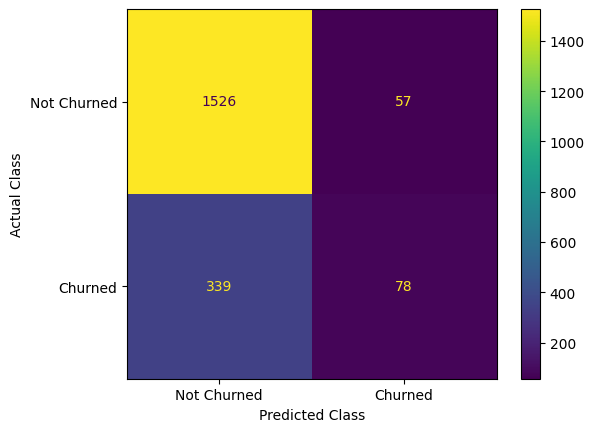

In [41]:
# create a heatmap of the matrix using confusionMatrixDisplay 

cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_lr))
cmd.plot()
# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

# Random Forest Classifier

In [42]:
rf = RandomForestClassifier(n_estimators=40)

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [44]:
rf.score(x_test,y_test)*100

86.05000000000001

In [45]:
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.8605

In [46]:
f1 = metrics.f1_score(y_test, y_pred_rf)
test_acc = metrics.accuracy_score(y_test, y_pred_rf)
con = metrics.confusion_matrix(y_test, y_pred_rf)
precision = metrics.precision_score(y_test, y_pred_rf)
recall = metrics.recall_score(y_test, y_pred_rf)

In [47]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.8605
Precision 0.7804878048780488
Recall 0.460431654676259
F1-Score 0.579185520361991
[[1529   54]
 [ 225  192]]


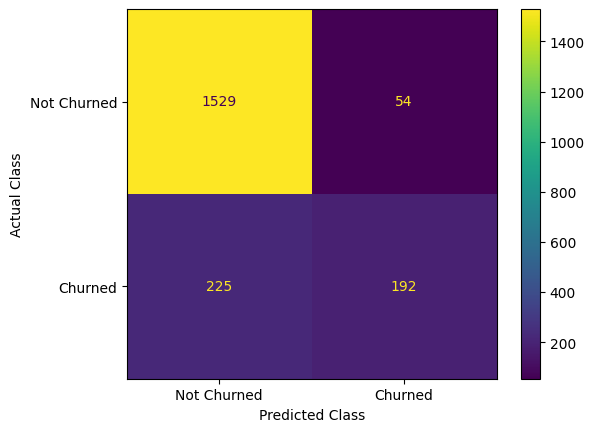

In [48]:
# create a heatmap of the matrix using confusionMatrixDisplay 

cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_rf))
cmd.plot()
# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

# DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
tree = DecisionTreeClassifier()

In [51]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
tree.score(x_test,y_test)*100

79.0

In [53]:
tree.score(x_train,y_train)*100

100.0

In [54]:
y_pred_tree=tree.predict(x_test)
accuracy_score(y_test,y_pred_tree)

0.79

In [55]:
f1 = metrics.f1_score(y_test, y_pred_tree)
test_acc = metrics.accuracy_score(y_test, y_pred_tree)
con = metrics.confusion_matrix(y_test, y_pred_tree)
precision = metrics.precision_score(y_test, y_pred_tree)
recall = metrics.recall_score(y_test, y_pred_tree)

In [56]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.79
Precision 0.49643705463182897
Recall 0.5011990407673861
F1-Score 0.4988066825775656
[[1371  212]
 [ 208  209]]


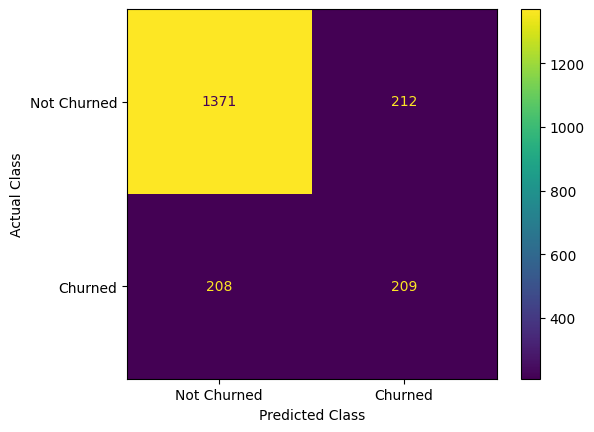

In [57]:
# create a heatmap of the matrix using confusionMatrixDisplay 

cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_tree))
cmd.plot()
# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

# GradientBoostingClassifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)
xg.score(x_test , y_test) 

0.843

In [59]:
f1 = metrics.f1_score(y_test, y_pred_xg)
test_acc = metrics.accuracy_score(y_test, y_pred_xg)
con = metrics.confusion_matrix(y_test, y_pred_xg)
precision = metrics.precision_score(y_test, y_pred_xg)
recall = metrics.recall_score(y_test, y_pred_xg)

In [60]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.843
Precision 0.6958174904942965
Recall 0.43884892086330934
F1-Score 0.538235294117647
[[1503   80]
 [ 234  183]]


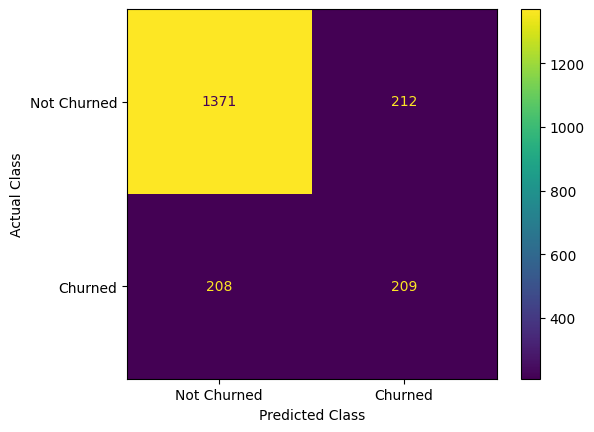

In [61]:
# create a heatmap of the matrix using confusionMatrixDisplay 

cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_tree))
cmd.plot()
# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [63]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1583
           1       0.70      0.44      0.54       417

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



# Prediction using KNN Classifier
 

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [65]:
y_pred_knn = knn.predict(x_test)
knn.score(x_test , y_test) 

0.837

In [66]:
f1 = metrics.f1_score(y_test, y_pred_xg)
test_acc = metrics.accuracy_score(y_test, y_pred_knn)
con = metrics.confusion_matrix(y_test, y_pred_knn)
precision = metrics.precision_score(y_test, y_pred_knn)
recall = metrics.recall_score(y_test, y_pred_knn)

In [67]:
print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print(con)

Accuracy Score 0.837
Precision 0.8473282442748091
Recall 0.26618705035971224
F1-Score 0.538235294117647
[[1563   20]
 [ 306  111]]


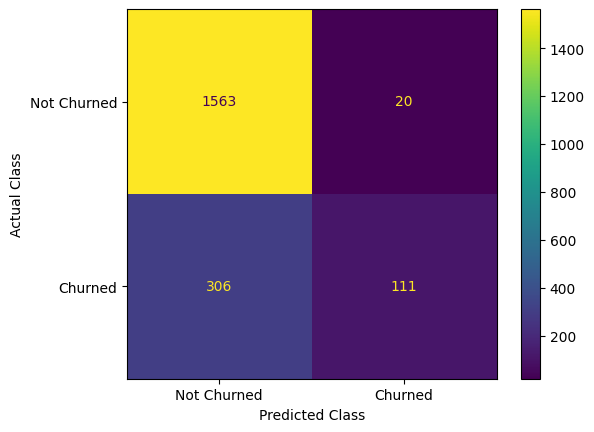

In [68]:
# create a heatmap of the matrix using confusionMatrixDisplay 

cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_knn))
cmd.plot()
# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()